In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

De acuerdo con la imputación de datos presentada en el fichero 00-Carga y AED, se presenta el conjunto de datos ajustado y para la presentación de la primera  iteración, se realiza el cargue de los mismos.

In [ ]:
data_imputado_anterior = pd.read_csv('https://drive.google.com/uc?export=download&id=1ZIZbKjuARboC_RdZH1ZbTS9JtmaTNFiF', sep = ',')
data_imputado_anterior.shape

(4417, 20)

El modelo de clasificación se propone predecir el comportamiento de la cotización EUR/USD, es decir si la fluctuación determina una condición a la alza o por el contrario a la baja. 

In [ ]:
data_imputado_anterior[['Tendencia']]

,Tendencia
0,Bajo
1,Bajo
2,Subio
3,Bajo
4,Bajo
...,...
4412,Bajo
4413,Bajo
4414,Bajo
4415,Bajo


"Tendencia" es una variable de tipo categorico, por lo tanto, se realiza la codificación de la misma a 0 y 1, con el fin de implementar el modelo correctamente.

In [ ]:
le = preprocessing.LabelEncoder()

X = data_imputado_anterior[['Cierre','Apertura','Máximo','Mínimo','Bitcoin','CAC40','DAX','DowJones','EuroStoxx50','HangSeng','IBEX35','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD']]
Y = data_imputado_anterior[['Tendencia']]

le.fit(Y['Tendencia'].unique())
Y = le.transform(Y['Tendencia'].values)
Y

array([0, 0, 1, ..., 0, 0, 0])

En este punto, se realiza la partición de los datos, entre los correspondientes a entrenamiento y prueba. La proporción entre cada una de las particiones es 80% y 20%, respectivamente.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)



```
# Esto tiene formato de código
```

El modelo que se implementa a continuación para la primera iteración de este proyecto es Random Forest, este modelo se propone realizar la clasificación de la variable "Tendencia" que indica si el comportamiento es alcista o bajista. Como parámetros del modelo, se incluye el prámetro GridSearch para evaluar diferentes y encontrar los mejores estimadores y profundidades de arboles. 

In [ ]:
#estimators =[100,140,180,240,300,400,500]
estimators =[500,600,700]
#depth = [12,14,18,20,25,30]
depth = [14,18,20]

rf = RandomForestClassifier(random_state=0)

parameters = {'n_estimators':estimators, 'max_depth':depth}

clf3 = GridSearchCV(estimator=rf, param_grid = parameters, scoring='balanced_accuracy',return_train_score=True)
clf3.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [14, 18, 20],
                         'n_estimators': [500, 600, 700]},
             return_train_score=True, scoring='balanced_accuracy')

Los mejores parámetros resultantes son los siguientes: 

In [ ]:
clf3.best_params_

{'max_depth': 18, 'n_estimators': 700}

Para representar la precisión del modelo, se presenta a continuación la matriz de confusión.


Balanced Accuracy = 0.664017751570154


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


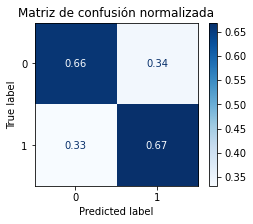

In [ ]:
print('Balanced Accuracy = '+str(balanced_accuracy_score(y_test,clf3.predict(X_test))))

fig, ax1 = plt.subplots(1, 1, figsize=(4,3))
plt.title("Matriz de confusión normalizada")

disp = plot_confusion_matrix(clf3, X_test, y_test,

cmap=plt.cm.Blues,
normalize='true',ax=ax1)
#print(title)
#print(disp.confusion_matrix)

plt.show() 